# Differential analysis

This notebook shows how to create a differential analysis based on two CombObj's (A and B) from two different cell types.

In [1]:
import tfcomb.objects

## Prepare GM12878 CombObj

The two objects contain ENCODE ChIP-seq peaks (1bp centered on the middle of the peak) from the celltypes GM12878 and K562 respectively.

In [2]:
A = tfcomb.objects.CombObj(verbosity=0)
A.prefix = "GM12878"
A.TFBS_from_bed("../data/GM12878_hg38_chr4_TF_chipseq.bed")
A.market_basket()

In [3]:
B = tfcomb.objects.CombObj(verbosity=0)
B.prefix = "K562"
B.TFBS_from_bed("../data/K562_hg38_chr4_TF_chipseq.bed")
B.market_basket()

## Compare two CombObj's

The two objects contain different amounts of TFs and rules:

In [4]:
print(A)
print(B)

<CombObj: 112109 TFBS (151 unique names) | Market basket analysis: 21284 rules>
<CombObj: 216370 TFBS (447 unique names) | Market basket analysis: 166088 rules>


We will now use the _.compare_-function of CombObj 'A' to directly compare it with CombObj 'B'. What you will see is that many of the TFs are different between the object and are thus removed:

In [5]:
compare_obj = A.compare(B)

The results of the differential analysis are now found in the .rules of the CombObj:

In [6]:
compare_obj.rules

,TF1,TF2,GM12878_cosine,K562_cosine,GM12878/K562_cosine_log2fc,GM12878/K562_cosine_log2fc_pvalue,GM12878/K562_cosine_log2fc_pvalue_adj
SIX5-SUZ12,SIX5,SUZ12,0.005640,0.478929,-3.296597,1.152000e-08,0.00014
SUZ12-SIX5,SUZ12,SIX5,0.005640,0.478929,-3.296597,1.152000e-08,0.00014
RCOR1-HDAC2,RCOR1,HDAC2,0.021535,0.451746,-2.845654,1.279131e-02,1.00000
HDAC2-RCOR1,HDAC2,RCOR1,0.021535,0.451746,-2.845654,1.279131e-02,1.00000
TCF12-HDAC2,TCF12,HDAC2,0.029991,0.459674,-2.702758,3.261756e-02,1.00000
...,...,...,...,...,...,...,...
TAF1-POLR2AphosphoS2,TAF1,POLR2AphosphoS2,0.309317,0.011989,2.574740,1.344348e-02,1.00000
MTA2-BMI1,MTA2,BMI1,0.340207,0.015346,2.615788,6.684798e-03,1.00000
BMI1-MTA2,BMI1,MTA2,0.340207,0.015346,2.615788,6.684798e-03,1.00000
BACH1-LARP7,BACH1,LARP7,0.322762,0.010475,2.664918,6.140275e-03,1.00000


## Plot differential co-occurring TFs

We can now have a look at the changes between the two objects in terms of 'cosine' measure:

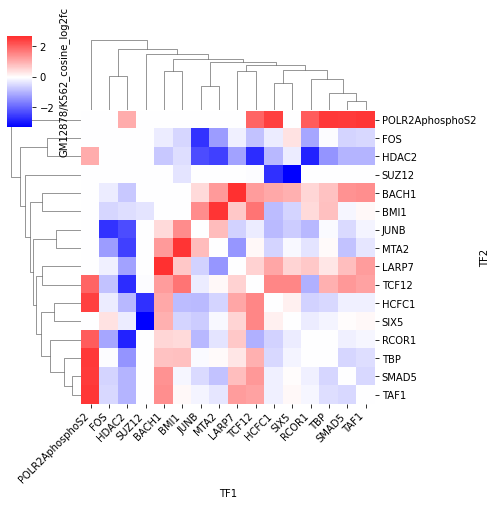

In [7]:
compare_obj.plot_heatmap()

Like in the case for CombObjs, we can also select a subset of interesting differentially co-occurring TFs:

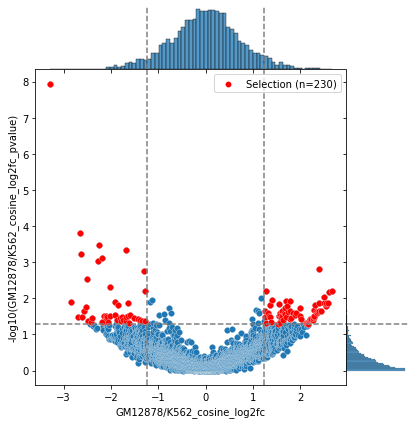

In [8]:
selection = compare_obj.select_rules()

We can also plot the network to show the pairs which are either increasing or decreasing in 'cosine' measure between the two cell types:

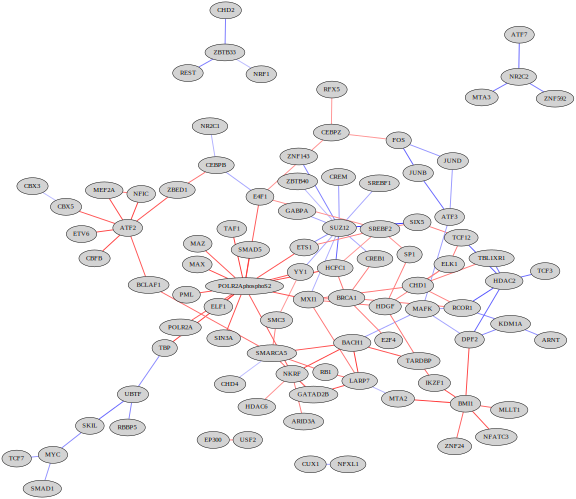

In [9]:
selection.plot_network()